### **Name:** Graham Nyaberi
### **Student Number:** 167209
### **Unit:** DSA8501
### **Unit Name:** Text and Unstructured Data Analytics
### **Project:** Climate Change Tweet Classification




###**Introduction**
<hr>
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.
With this context, I have been challenged to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

### **Highlights of Projects**
<hr>
<li> Globally, a number of companies are championing environmental sustainability and a reduced carbon footprints</li>

<li> Deduction of human perception about Climate Change and its threats </li>

<li> Strengthening of market research processes via human perception of climate change </li>

<li> Effects of human perception about climate change on their products and services </li>


### **Research Problem**
<hr>
The primary research problem addressed in this project is the classification of tweets related to climate change. Specifically, the goal is to develop a Machine Learning model that can classify whether individuals believe in climate change based on their tweets.


### **Research Gap**
<hr>

Despite existing studies, there remains a significant gap in:

<li> Contextual Analysis: Many studies do not account for the context in which tweets are made, leading to potential misclassifications. This project aims to incorporate contextual features to enhance model accuracy.</li>

<li> Diverse Data Sources: Most research has focused on specific platforms or datasets. This project utilizes a novel dataset from Twitter, which may yield different insights compared to previous studies.</li>


<li> Comprehensive Classification: The classification scheme used in this project (Pro, Anti, Neutral, News) is more granular than many existing studies, which often simplify sentiment into binary categories (positive/negative).</li>


<li> Model Performance Evaluation: There is a need for robust evaluation metrics beyond accuracy, such as F1 score, precision, and recall, to ensure the model's reliability in real-world applications.</li>

### **Data Description**
<hr>
The dataset used for this research consists of tweets related to climate change, which are categorized into four sentiment classes: Pro, Anti, Neutral, and News. The dataset comprises the following columns:

<li>Tweet ID: A unique identifier for each tweet.</li>
<li>Message: The text content of the tweet, which expresses the user's sentiment regarding climate change.</li>
<li>Sentiment: An integer label representing the sentiment category:</li>

### **Related Works in Brief**
<hr>
Several studies have explored the intersection of social media and climate change sentiment analysis. Key points from related works include:

<li>Sentiment Analysis Techniques: Various methods such as Natural Language Processing (NLP) and Machine Learning algorithms (like Naive Bayes and Logistic Regression) have been employed to analyze sentiments in social media data.</li>

<li>Public Perception Studies: Research has shown that public perceptions of climate change can significantly influence policy-making and corporate strategies. Understanding these perceptions through social media analysis provides valuable insights.</li>

<li>Feature Engineering: Previous works have highlighted the importance of feature extraction techniques, such as TF-IDF and word embeddings, to improve the accuracy of sentiment classification models.</li>

### **Project Road Map**
<hr>
<li> Analyse the supplied data </li>
<li> identify potential errors in the data and clean the existing data set </li>
<li> Determine if additional features can be added to enrich the data set</li>
<li> Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.</li>
<li> Evaluate the accuracy of the best machine learning model</li>
<li> Determine what features were most important in the model’s prediction decision</li>
<li> Explain the inner working of the model to a non-technical audience.</li>




In [13]:
!pip install wordcloud
import nltk
nltk.download(['stopwords', 'wordnet'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

 <a id="one"></a>
## **1. Importing Packages**

<b>We imported all the libraries and modules potentially needful for this project.</b>


In [14]:
import numpy as np
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
stop = stopwords.words('english')
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

import warnings
# Suppress warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## **2. Loading Data**


In [15]:
# Instead of 'max_rows', use 'display.max_rows'
pd.set_option('display.max_rows', None)  # Display max rows
pd.set_option('display.max_columns', None)  # Display max columns
# Use pandas read_csv method to load data
df = pd.read_csv('https://raw.githubusercontent.com/Nyasoko/TUDA/refs/heads/main/train.csv')
dft = pd.read_csv('https://raw.githubusercontent.com/Nyasoko/TUDA/refs/heads/main/test.csv')
print(df.shape)
df.head()

(15819, 3)


sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

<b>The datastet comprises of 3 columns and 15819 rows of data showing tweet ids, messages and sentiment category. The columns represent:</b>

*   tweetid: Unique identifier for each tweet.
*   message: Text content of the tweet.
*   sentiment: Integer representing the sentiment category.








<a id="three"></a>
## **3. Exploratory Data Analysis (EDA)**
<a class="anchor" id="1.1"></a>




<b> Firstly, we would check for missing values and duplicated values in the dataset.</b>

In [16]:
# Use pandas dataframe info() method to check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


<b> From the above we can see that there are no null values present in the above dataset </b>

#### **Class Description for Sentiment Column**
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

In [17]:
sentiment_name_dict = {-1 : 'Anti :this fellow does not believe in man-made climate change ', 0 : 'Neutral:this fellow neither supports nor refutes the belief of man-made climate change',1: 'Pro: this fellow supports the belief of man-made climate change', 2 : 'News:this fellow is helping to share  factual news about climate change '}

In [18]:
df.sentiment.value_counts()

sentiment
 1    8530
 2    3640
 0    2353
-1    1296
Name: count, dtype: int64

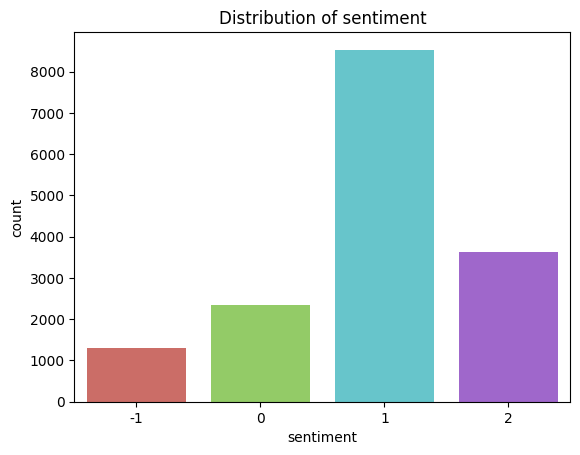

In [19]:
# A sentiment bar graph plot
sns.countplot(x = 'sentiment', data = df, palette="hls")
plt.title("Distribution of sentiment");

**Bar Graph: A count plot visualizes the distribution of sentiments, illustrating how many tweets fall into each sentiment category.**

In [20]:
dft.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

In [21]:
df_train = df.drop(['tweetid'],axis=1)
df_test = dft.drop(['tweetid'],axis=1)

In [22]:
df_train.head()

sentiment                                            message
0          1  PolySciMajor EPA chief doesn't think carbon di...
1          1  It's not like we lack evidence of anthropogeni...
2          2  RT @RawStory: Researchers say we have three ye...
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...

In [23]:
df_test.head()

message
0  Europe will now be looking to China to make su...
1  Combine this with the polling of staffers re c...
2  The scary, unimpeachable evidence that climate...
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...
4  RT @FakeWillMoore: 'Female orgasms cause globa...

In [24]:
# segregating dataframe for analyzing individual sentiments
news=df_train[(df_train['sentiment']==2)]
neutral=df_train[(df_train['sentiment']==0)]
pro=df_train[(df_train['sentiment']==1)]
anti=df_train[(df_train['sentiment']==-1)]


In [25]:
news.head()

sentiment                                            message
2           2  RT @RawStory: Researchers say we have three ye...
12          2  RT @tveitdal: We only have a 5 percent chance ...
14          2  Fossil fuel giant ExxonMobil ‘misled’ the publ...
26          2  Bangladesh confronting climate change head on ...
32          2  RT @latimes: Atmospheric rivers fueled by clim...

Text(0.5, 1.0, 'Word cloud for News Sentiment')

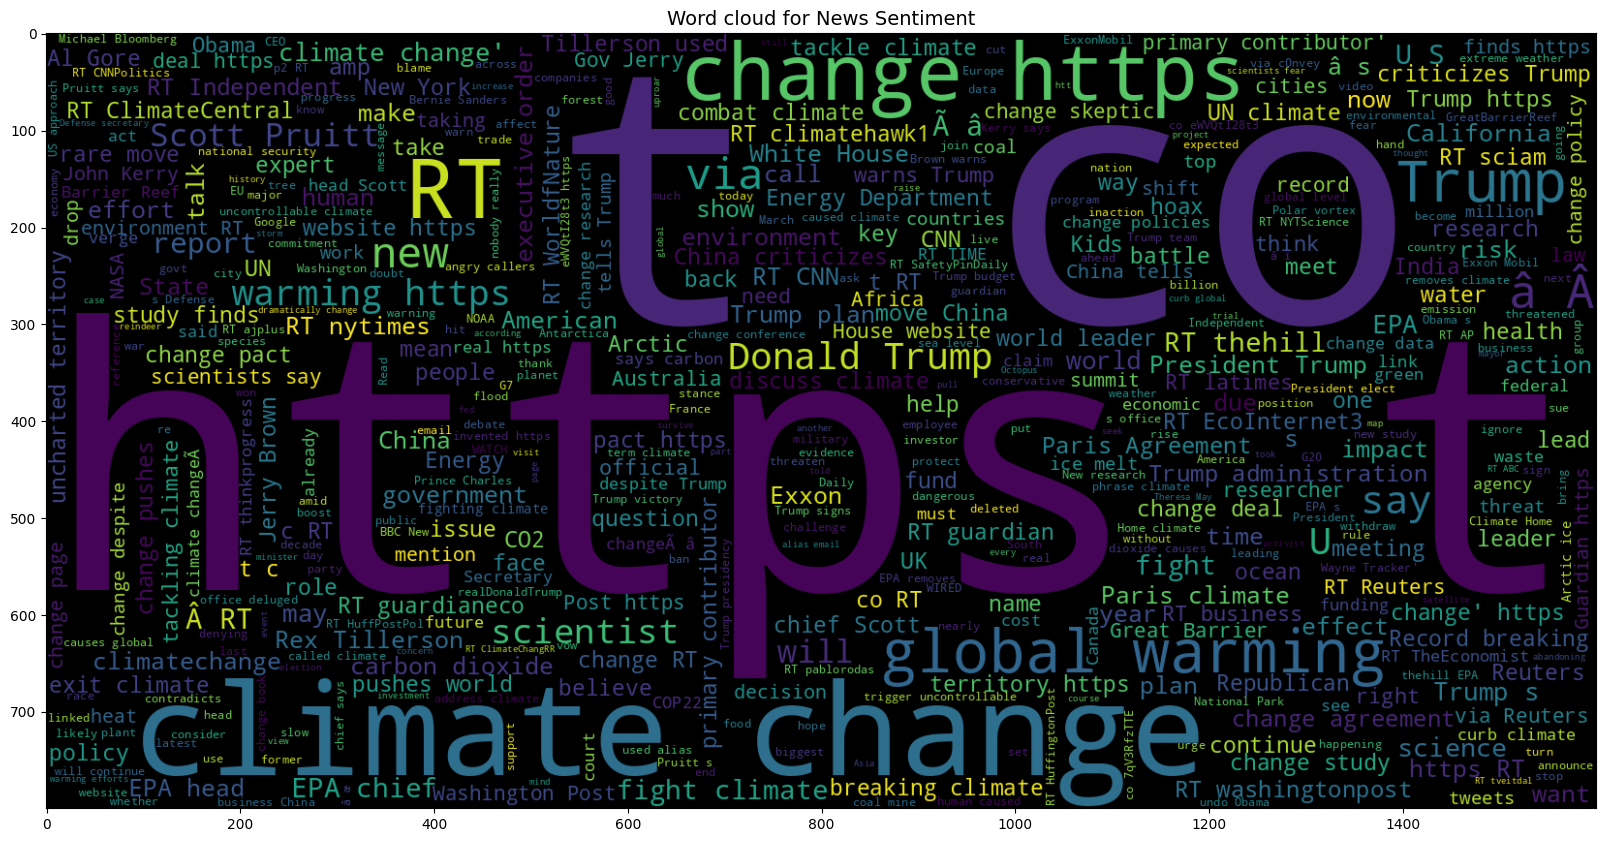

In [26]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(news.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for News Sentiment',fontsize=14)

Text(0.5, 1.0, 'Word cloud for News Sentiment')

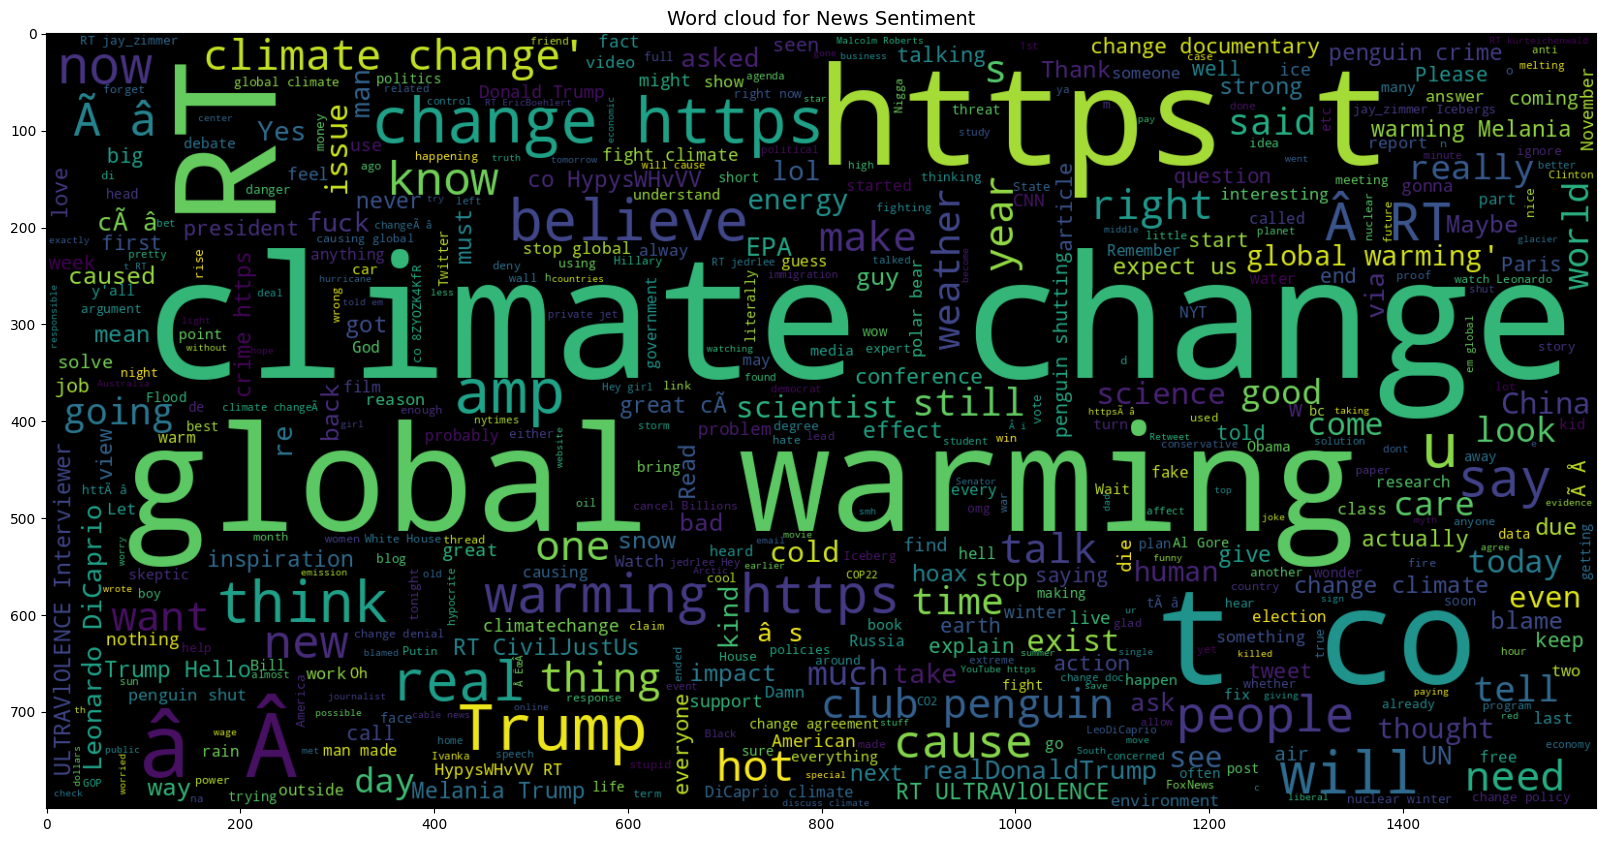

In [27]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(neutral.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for News Sentiment',fontsize=14)

Text(0.5, 1.0, 'Word cloud for News Sentiment')

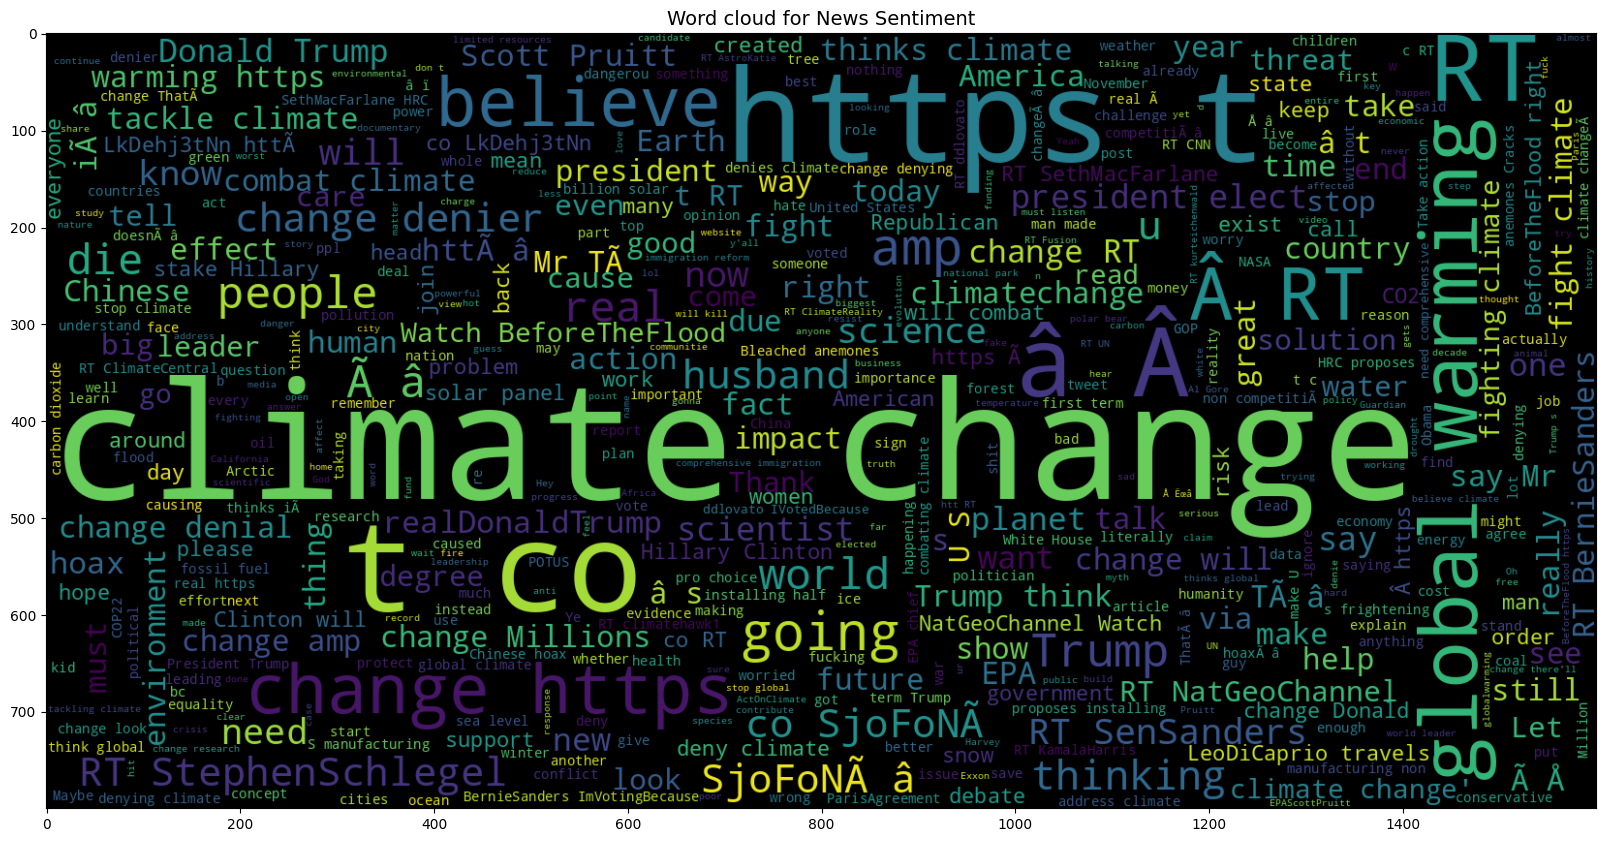

In [28]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(pro.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for News Sentiment',fontsize=14)

Text(0.5, 1.0, 'Word cloud for News Sentiment')

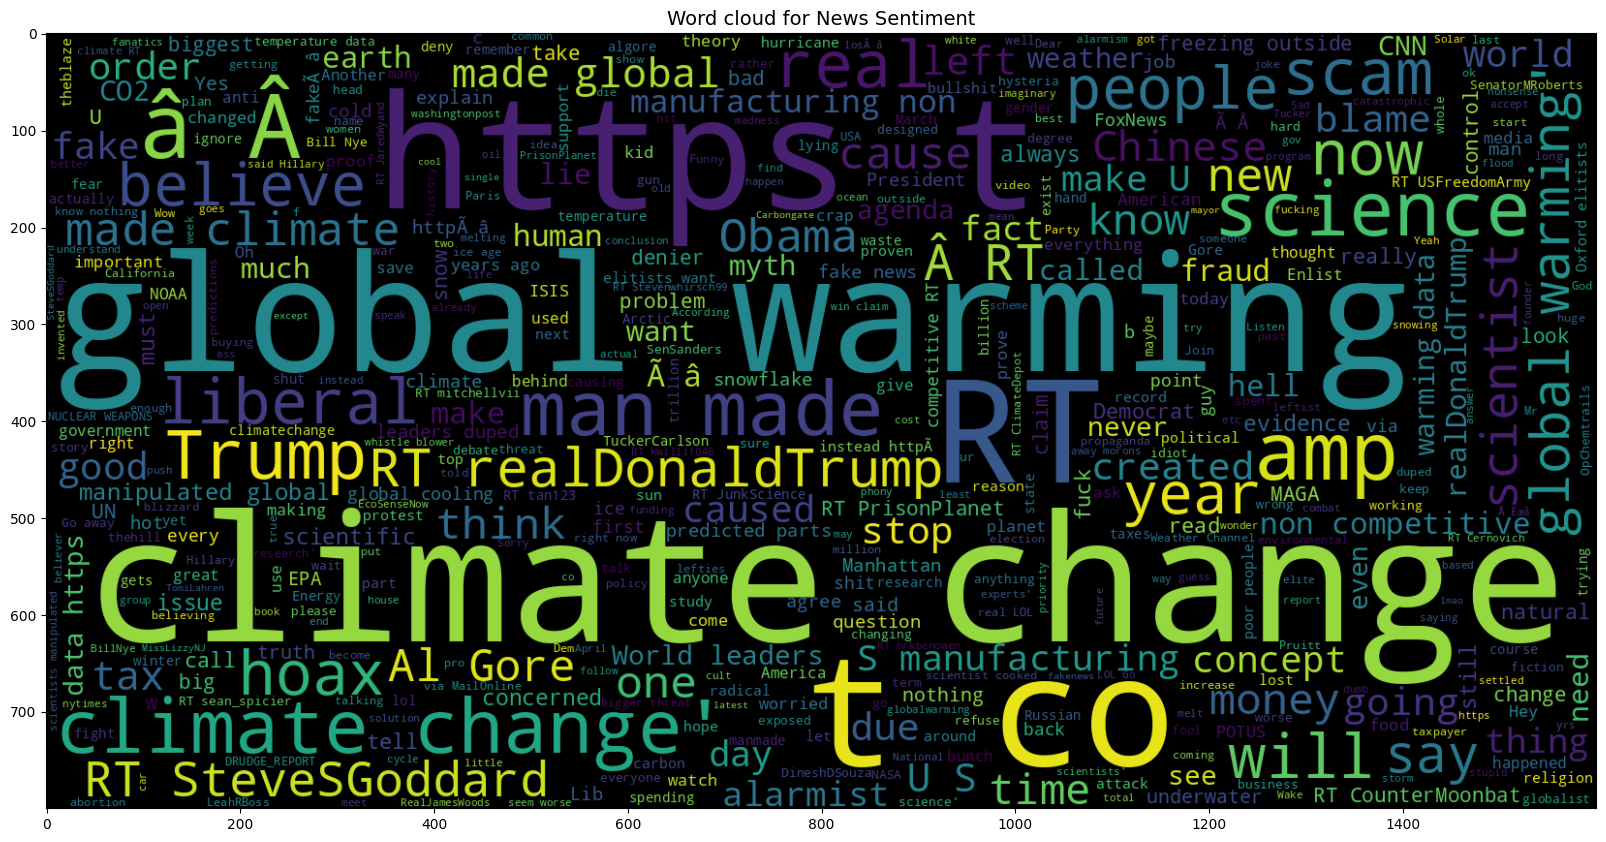

In [29]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(anti.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for News Sentiment',fontsize=14)

**Word clouds are generated for each sentiment category (News, Neutral, Pro, Anti), visually representing the most frequently used words in tweets for each sentiment. The size of each word corresponds to its frequency in the respective category.**

<a id="four"></a>
## **4. Data Preprocessing & Feature Engineering**
<a class="anchor" id="1.1"></a>




In [30]:
df_train['message'][10]

"RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦"

In [31]:
def review_to_words(raw_message):
    # 1. Delete HTML
    message_text = BeautifulSoup(raw_message, 'html.parser').get_text()
    #letters2 =raw_message.replace('http\S+|www.\S+', '', case=False)
    # 2. Make a space

    letters3 = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', message_text)
    letters_only = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))', '', letters3, flags=re.MULTILINE)
    letters = re.sub('[^a-zA-Z]', ' ',  letters_only)
    letters1 = re.sub(r'http', ' ', letters)

    #letters_only = re.sub('[^a-zA-Z]', ' ', message_text)
    # 3. lower letters
    words = letters1.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [32]:
df_train['cleaned_message'] = df_train['message'].apply(review_to_words)

In [33]:
df_test['cleaned_message2'] = df_test['message'].apply(review_to_words)

In [34]:
df_train.head()

sentiment                                            message  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   
1          1  It's not like we lack evidence of anthropogeni...   
2          2  RT @RawStory: Researchers say we have three ye...   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   

                                     cleaned_message  
0  polyscimajor epa chief think carbon dioxide ma...  
1    like lack evidence anthropogenic global warming  
2  rt rawstory researcher say three year act clim...  
3  todayinmaker wired pivotal year war climate ch...  
4  rt soynoviodetodas racist sexist climate chang...

In [35]:
df_test.head()

message  \
0  Europe will now be looking to China to make su...   
1  Combine this with the polling of staffers re c...   
2  The scary, unimpeachable evidence that climate...   
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   
4  RT @FakeWillMoore: 'Female orgasms cause globa...   

                                    cleaned_message2  
0  europe looking china make sure alone fighting ...  
1  combine polling staffer climate change womens ...  
2  scary unimpeachable evidence climate change al...  
3  karoli morgfair osborneink dailykos putin got ...  
4  rt fakewillmoore female orgasm cause global wa...

**The output shows the first few entries of the cleaned_message column, which contains preprocessed text. This preprocessing includes HTML removal, URL stripping, lowercasing, stop word removal, and lemmatization.**

#### **Creating Features**

In [36]:
X_feat=df_train['cleaned_message']
y=df_train['sentiment']

In [63]:
X_tfeat = df_test['cleaned_message2']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

#### **Confusion Matrix :**
This will help visualise the performance of the model by comparing ground truth values with the predicted results. It also highlight inaccuracies of the model

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### **Vectorize Words**

In [40]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)
count_test_real = count_vectorizer.transform(X_tfeat)

In [41]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.2)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)
tfidf_test_2_real = tfidf_vectorizer.transform(X_tfeat)

<a id="five"></a>
## **5. Modelling**
<a class="anchor" id="1.1"></a>

<li><b> In this section, Different vectorisers and models were used </b></li>
<li><b> Model improvement was also taking into consideration</b></li>
    


## **1. Multinomial Naive Bayes Classifier & Count Vectoriser**

accuracy:   0.704
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.89      0.27      0.42       259
           0       0.69      0.23      0.34       471
           1       0.69      0.92      0.79      1706
           2       0.73      0.66      0.70       728

    accuracy                           0.70      3164
   macro avg       0.75      0.52      0.56      3164
weighted avg       0.72      0.70      0.67      3164



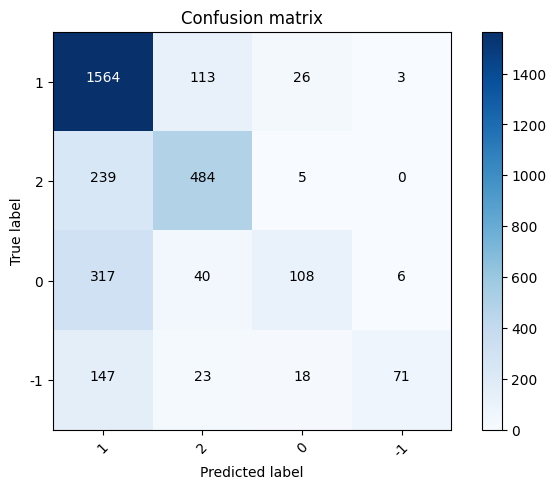

In [42]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_test_real = count_vectorizer.transform(X_tfeat)



mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, pred))

## **2.  Passive Aggressive Classifier & Count Vectoriser**

accuracy:   0.691
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.55      0.44      0.48       259
           0       0.49      0.38      0.43       471
           1       0.77      0.78      0.78      1706
           2       0.65      0.77      0.71       728

    accuracy                           0.69      3164
   macro avg       0.61      0.59      0.60      3164
weighted avg       0.68      0.69      0.68      3164



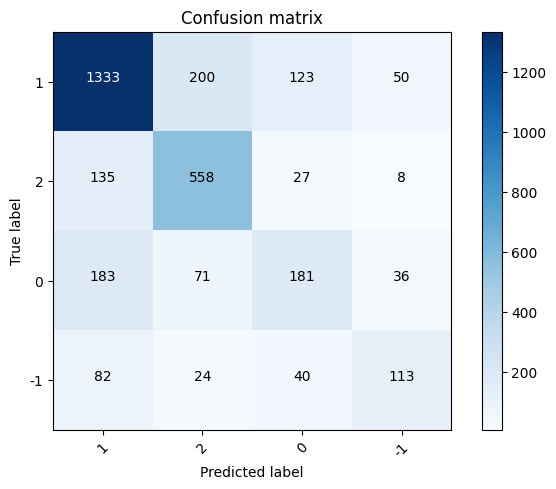

In [43]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_test_real = count_vectorizer.transform(X_tfeat)




passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, pred))

## **3. Multinomial Naive Bayes Classifier  & TF-IDF vectoizer**

accuracy:   0.624
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       1.00      0.02      0.05       259
           0       0.93      0.06      0.11       471
           1       0.59      0.99      0.74      1706
           2       0.86      0.35      0.50       728

    accuracy                           0.62      3164
   macro avg       0.85      0.36      0.35      3164
weighted avg       0.74      0.62      0.54      3164



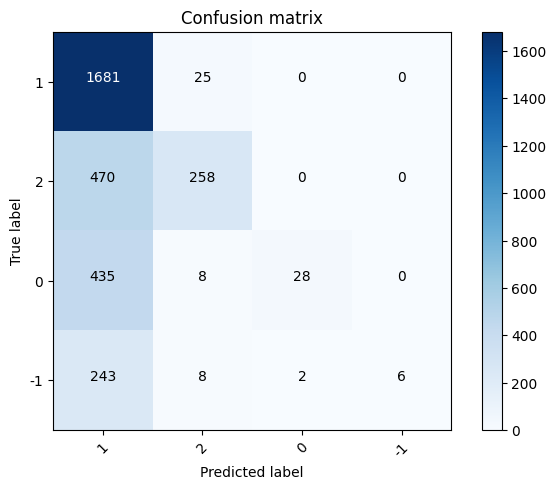

In [44]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)
tfidf_test_2_real = tfidf_vectorizer.transform(X_tfeat)


mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, pred))

## **4. Passive Aggressive Classifier & TF-IDF Vectorizer**

accuracy:   0.697
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.57      0.44      0.49       259
           0       0.49      0.36      0.42       471
           1       0.76      0.81      0.78      1706
           2       0.68      0.75      0.71       728

    accuracy                           0.70      3164
   macro avg       0.63      0.59      0.60      3164
weighted avg       0.69      0.70      0.69      3164



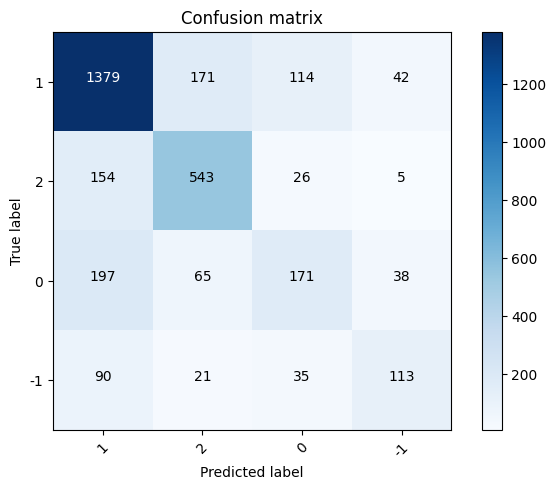

In [45]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier(C = 0.5, random_state = 5)
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, pred))

## **5. Logistic Regression Classifier & TF-IDF Vectorizer**

accuracy:   0.703
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.80      0.25      0.38       259
           0       0.67      0.25      0.36       471
           1       0.69      0.92      0.79      1706
           2       0.74      0.65      0.69       728

    accuracy                           0.70      3164
   macro avg       0.73      0.52      0.56      3164
weighted avg       0.71      0.70      0.67      3164



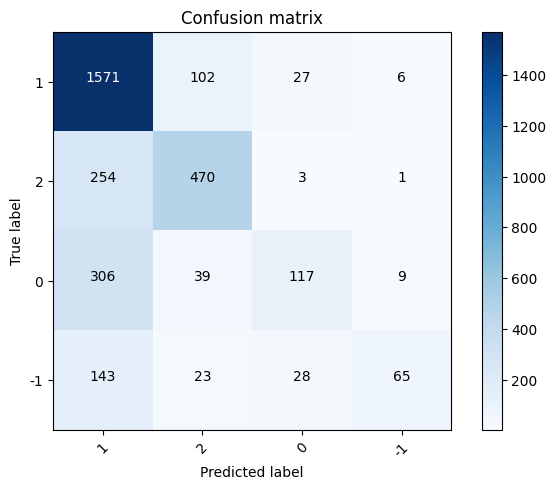

In [46]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_test_real = tfidf_vectorizer.transform(X_tfeat)


logreg = LogisticRegression(multi_class='ovr',solver='lbfgs', max_iter=100)
logreg.fit(tfidf_train, y_train)
y_pred_test_lgr_tf = logreg.predict(tfidf_test)
y_test_real_pred = logreg.predict(tfidf_test_real)
score = metrics.accuracy_score(y_test,y_pred_test_lgr_tf)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_test_lgr_tf, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, y_pred_test_lgr_tf))

## **6. Logistic Regression Classifier & Count Vectorizer**

accuracy:   0.703
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.77      0.40      0.53       259
           0       0.59      0.38      0.46       471
           1       0.74      0.88      0.80      1706
           2       0.72      0.71      0.72       728

    accuracy                           0.73      3164
   macro avg       0.71      0.59      0.63      3164
weighted avg       0.72      0.73      0.71      3164



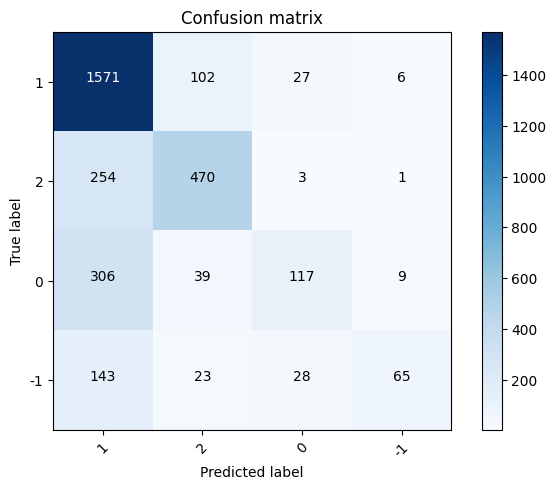

In [47]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_test_real = count_vectorizer.transform(X_tfeat)


logreg = LogisticRegression(multi_class='ovr',solver='lbfgs', max_iter=100)
logreg.fit(count_train, y_train)
y_pred_test_lgr_cv = logreg.predict(count_test)
y_test_real_pred = logreg.predict(count_test_real)
score = metrics.accuracy_score(y_test,y_pred_test_lgr_tf)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_test_lgr_tf, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, y_pred_test_lgr_cv))

## **7. GridSearch to improve the Logistic Regression Model**

In [48]:
logreg = LogisticRegression(multi_class='ovr',solver='lbfgs', max_iter=100)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 20,50,100]}

Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.77      0.40      0.53       259
           0       0.59      0.38      0.46       471
           1       0.74      0.88      0.80      1706
           2       0.72      0.71      0.72       728

    accuracy                           0.73      3164
   macro avg       0.71      0.59      0.63      3164
weighted avg       0.72      0.73      0.71      3164



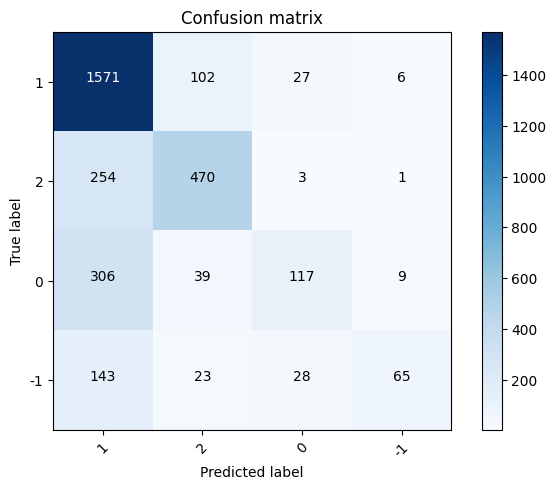

In [49]:
# Training and testing using GridSearch
clf = GridSearchCV(logreg,
                   param_grid=param_grid,
                   cv=10,
                   n_jobs=-1)

clf.fit(count_train, y_train)
y_pred_lr_g = clf.predict(count_test)
y_pred_lr_g_real = clf.predict(count_test_real)
cm = metrics.confusion_matrix(y_test, y_pred_test_lgr_tf, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, y_pred_lr_g))

## **8. Random Forest Classifier & Tf-idf Vectorizer**

accuracy:   0.686
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.90      0.23      0.37       259
           0       0.51      0.40      0.45       471
           1       0.71      0.85      0.77      1706
           2       0.69      0.65      0.67       728

    accuracy                           0.69      3164
   macro avg       0.70      0.53      0.57      3164
weighted avg       0.69      0.69      0.67      3164



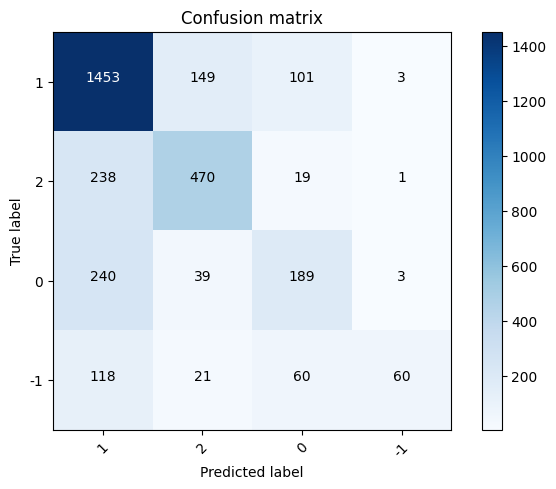

In [50]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500000, ngram_range=(1, 2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_test_real = tfidf_vectorizer.transform(X_tfeat)



rfc = RandomForestClassifier()
rfc.fit(tfidf_train, y_train)
pred = rfc.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, pred))



## **Classification Report:**

*   Each model's classification report includes precision, recall, and F1-score for each sentiment category, providing a comprehensive view of model performance.
*   For example, the report for the Multinomial Naive Bayes model shows:
      
        *   Precision: Measures the accuracy of positive predictions.
        *   Recall: Measures the ability to find all relevant instances.
        *   F1-score: Harmonic mean of precision and recall.


## HYPERPARAMETER TUNING

### **Hyperparameter Tuning: Logistic Regression Classifier & TF-IDF Vectorizer**

accuracy:   0.710
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.82      0.26      0.40       259
           0       0.72      0.29      0.41       471
           1       0.69      0.92      0.79      1706
           2       0.76      0.64      0.69       728

    accuracy                           0.71      3164
   macro avg       0.75      0.53      0.57      3164
weighted avg       0.72      0.71      0.68      3164



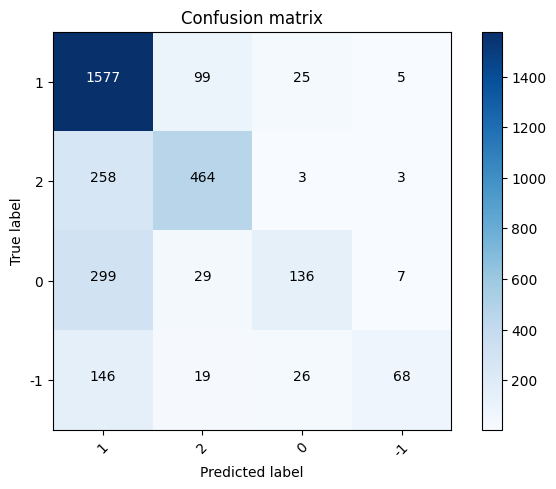

In [51]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500000, ngram_range=(1, 2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_test_real = tfidf_vectorizer.transform(X_tfeat)


logreg = LogisticRegression(multi_class='ovr',solver='lbfgs', max_iter=100)
logreg.fit(tfidf_train, y_train)
y_pred_test_lgr_tf = logreg.predict(tfidf_test)
y_test_real_pred = logreg.predict(tfidf_test_real)
score = metrics.accuracy_score(y_test,y_pred_test_lgr_tf)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_test_lgr_tf, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, y_pred_test_lgr_tf))

## **Hyperparameter Tuning: Passive Aggressive Classifier & Count Vectoriser**

accuracy:   0.732
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.67      0.43      0.52       259
           0       0.58      0.44      0.50       471
           1       0.76      0.86      0.81      1706
           2       0.75      0.73      0.74       728

    accuracy                           0.73      3164
   macro avg       0.69      0.61      0.64      3164
weighted avg       0.72      0.73      0.72      3164



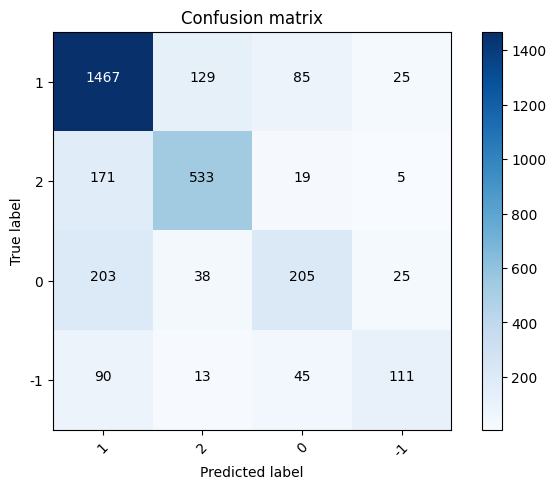

In [52]:
count_vector = CountVectorizer(lowercase=True, stop_words='english', max_features=4000000,ngram_range=(1, 2))
X_train_count_vector = count_vector.fit_transform(X_train.values.astype(str))
X_test_count_vector = count_vector.transform(X_test.values.astype(str))
X_test_real_vector = count_vector.transform(X_tfeat.values.astype(str))





pass_tf = PassiveAggressiveClassifier(C = 0.6, random_state = 10,max_iter=100)
pass_tf.fit(X_train_count_vector, y_train)
pred_t = pass_tf.predict(X_test_count_vector)
score = metrics.accuracy_score(y_test, pred_t)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_t, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, pred_t))



## **Hyperparameter Tuning: Logistic Regression Classifier & Count Vectorizer**

accuracy:   0.747
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.86      0.40      0.54       259
           0       0.67      0.42      0.52       471
           1       0.75      0.90      0.82      1706
           2       0.76      0.73      0.74       728

    accuracy                           0.75      3164
   macro avg       0.76      0.61      0.66      3164
weighted avg       0.75      0.75      0.73      3164



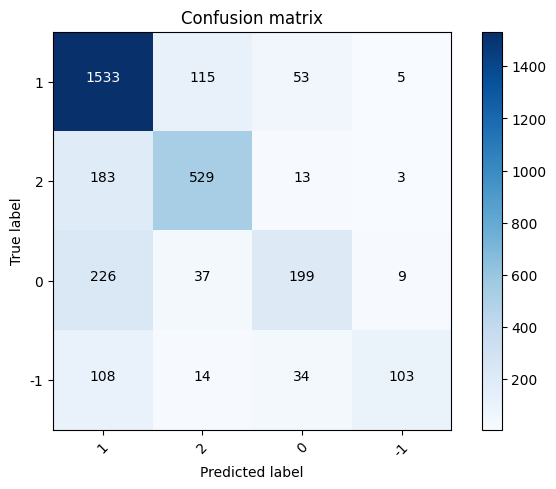

In [53]:
count_vector = CountVectorizer(lowercase=True, stop_words='english', max_features=1000000, ngram_range=(1, 2))
X_train_count_vector = count_vector.fit_transform(X_train.values.astype(str))
X_test_count_vector = count_vector.transform(X_test.values.astype(str))
X_test_real_vector = count_vector.transform(X_tfeat.values.astype(str))



logreg = LogisticRegression(multi_class='ovr',solver='lbfgs', max_iter=1000)
logreg.fit(X_train_count_vector, y_train)
y_pred_test = logreg.predict(X_test_count_vector)
y_test_real_pred = logreg.predict(X_test_real_vector)
score = metrics.accuracy_score(y_test, y_pred_test)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_test, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, y_pred_test))

In [54]:
import pickle

model_save_path = "logreg_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(logreg,file)

## **Hyperparameter Tuning: Passive Aggressive Classifier & Tf-IDF Vectorizer (Bigrams)**

accuracy:   0.740
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.68      0.46      0.55       259
           0       0.63      0.39      0.48       471
           1       0.76      0.88      0.82      1706
           2       0.75      0.73      0.74       728

    accuracy                           0.74      3164
   macro avg       0.71      0.62      0.65      3164
weighted avg       0.73      0.74      0.73      3164



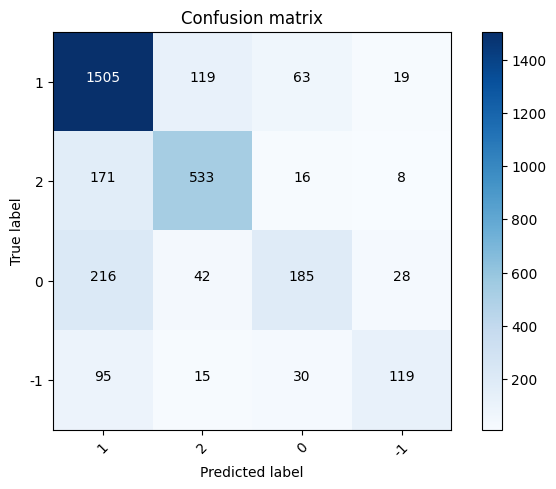

In [55]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=50000000, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)


pass_tf = PassiveAggressiveClassifier(C = 0.5, random_state = 5,max_iter=1000)
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
# Saving each metric to add to a dictionary for logging
print(classification_report(y_test, pred))

In [56]:
import pickle

model_save_path = "Passiveagg_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(pass_tf,file)

In [57]:
import pickle

model_save_path = "tf-idf.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(tfidf_vectorizer2,file)

## **Hyperparameter Tuning: Passive Aggressive Classifier & Tf-IDF Vectorizer (Trigrams)**

accuracy:   0.729
Confusion matrix, without normalization
              precision    recall  f1-score   support

          -1       0.62      0.49      0.55       259
           0       0.60      0.35      0.45       471
           1       0.76      0.86      0.80      1706
           2       0.73      0.75      0.74       728

    accuracy                           0.73      3164
   macro avg       0.68      0.61      0.64      3164
weighted avg       0.72      0.73      0.72      3164



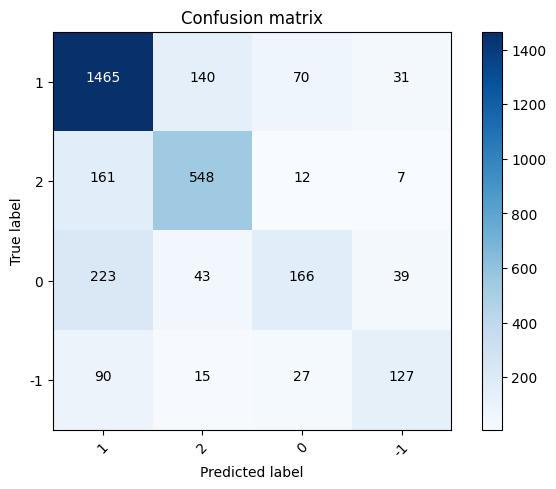

In [58]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.6, ngram_range=(1,2))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
print(classification_report(y_test, pred))

**Grid Search Output:**
The results of hyperparameter tuning show improved accuracy scores for models after tuning, such as:

Logistic Regression: accuracy: 0.747

This indicates that tuning the model parameters can lead to better performance.

<a id="six"></a>
## **6. Model Performance & Validation**
<a class="anchor" id="1.1"></a>




## Model Validation

<b> A function was developed to deduce the model with the highest F1 score alongside the processing time, recall and precision values.</b>

In [59]:
names = [ 'Multinomial (Naive bayes)',
         'Passive Aggressive', 'Logistic Regression', 'Random Forest', 'Passive Agressive Tuned']

In [60]:
classifiers = [
    MultinomialNB(),
    PassiveAggressiveClassifier(),
    LogisticRegression(multi_class='ovr',solver='lbfgs', max_iter=100),
     RandomForestClassifier(),
    PassiveAggressiveClassifier(C = 0.5, random_state = 5,max_iter=1000)
]

In [61]:
results = []

models = {}
confusion = {}
class_report = {}

tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=50000000, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)



for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(tfidf_train_2, y_train)

    print ('... predicting')
    y_pred = clf.predict(tfidf_train_2)
    y_pred_test = clf.predict(tfidf_test_2)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='micro')
    recall    = metrics.recall_score(y_train, y_pred,average='micro')

    f1        = metrics.f1_score(y_train, y_pred, average='micro')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='micro')

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Multinomial (Naive bayes) model...
... predicting
... scoring
Fitting Passive Aggressive model...
... predicting
... scoring
Fitting Logistic Regression model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Passive Agressive Tuned model...
... predicting
... scoring
... All done!


In [62]:
results.sort_values('F1 Test', ascending=False)

Accuracy  Precision    Recall  F1 Train   F1 Test  \
Classifier                                                                     
Passive Agressive Tuned    0.998420   0.998420  0.998420  0.998420  0.740202   
Passive Aggressive         0.998657   0.998657  0.998657  0.998657  0.737674   
Logistic Regression        0.793362   0.793362  0.793362  0.793362  0.709545   
Random Forest              0.998657   0.998657  0.998657  0.998657  0.683628   
Multinomial (Naive bayes)  0.719874   0.719874  0.719874  0.719874  0.627686   

                           Train Time  
Classifier                             
Passive Agressive Tuned      0.289123  
Passive Aggressive           0.203988  
Logistic Regression          4.762553  
Random Forest               64.747243  
Multinomial (Naive bayes)    0.010320

**The table summarizes the performance of different classifiers, displaying metrics like accuracy, precision, recall, and F1 scores for both training and testing datasets.
The best-performing model is highlighted, indicating which classifier achieved the highest F1 test score.**

<a id="seven"></a>
## **7. Conclusion**
<a class="anchor" id="1.1"></a>



<b>In conclusion, the Passive Aggressive Classifier proved to be the best model based on the F1 test score and processing time, summarizing the effectiveness of the model in classifying tweets regarding climate change sentiment.</b>